# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Loading The Dataset

In [2]:
# Define paths for training and testing datasets

data_train_path = r"C:\Users\Dell\Desktop\Visom6\Jewellery-Classification-master\dataset\training"
data_test_path = r"C:\Users\Dell\Desktop\Visom6\Jewellery-Classification-master\dataset\test"

In [3]:
# Standardizing Image Size

img_width, img_height = 180, 180

In [4]:
# Loading the training and testing datasets
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 1566 files belonging to 5 classes.


In [5]:
data_cat = data_train.class_names
data_cat

['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH']

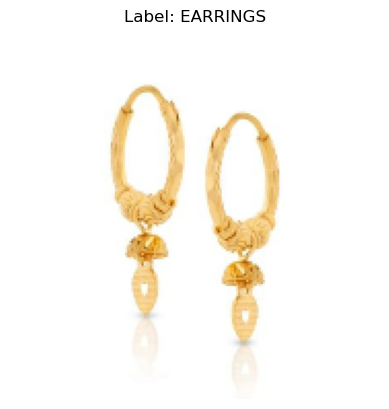

In [6]:
# Assuming 'class_names' is a property of the dataset

class_names = data_train.class_names

# Iterate through the dataset to get one batch (batch_size=32)

for images, labels in data_train:
    # Take the first image from the batch
    image = images[17]
    label = labels[17]  # Numeric label
    
    # Convert the numeric label to its corresponding class name
    label_name = class_names[label.numpy()]
    
    # Display the image
    plt.figure()
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {label_name}")
    plt.axis("off")
    plt.show()
    break  # Break after displaying the first image

In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 250 files belonging to 5 classes.


# model training

In [8]:
# Load the VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [9]:
# Freeze the base model layers to retain the pre-trained weights

for layer in base_model.layers:
    layer.trainable = False

In [10]:
# Add new layers on top for your specific problem
classifier = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(data_train.class_names), activation='softmax')
])

In [11]:
classifier.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),            ## Remove from_logits=True
                   metrics=['accuracy'])

In [12]:
# Train the model
epochs_size = 25  # Increased epochs  original number 50
history = classifier.fit(data_train, validation_data=data_test, epochs=epochs_size)

Epoch 1/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.6001 - loss: 3.6690 - val_accuracy: 0.8960 - val_loss: 0.4664
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.8728 - loss: 0.6820 - val_accuracy: 0.9160 - val_loss: 0.3059
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.9373 - loss: 0.2911 - val_accuracy: 0.9320 - val_loss: 0.1607
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9401 - loss: 0.2915 - val_accuracy: 0.8960 - val_loss: 0.4709
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.9649 - loss: 0.1627 - val_accuracy: 0.9120 - val_loss: 0.4060
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.9638 - loss: 0.1947 - val_accuracy: 0.9160 - val_loss: 0.3060
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.9696 - loss: 0.1164 - val_accuracy: 0.9200 - val_loss: 0.2626
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9682 - loss: 0.1452 - val_accuracy: 0.9280 - v

In [13]:
# Evaluate the model
train_score = classifier.evaluate(data_train)
test_score = classifier.evaluate(data_test)

print("Training Loss:", train_score[0])
print("Training Accuracy:", train_score[1])
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 1.0000 - loss: 5.1678e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9315 - loss: 0.3534
Training Loss: 0.00041068531572818756
Training Accuracy: 1.0
Test Loss: 0.2992776036262512
Test Accuracy: 0.9359999895095825


# predicting on new data

In [14]:
# Predicting on a single image

image_1_path = r"C:\Users\Dell\Downloads\jewellery test_1.jpeg"
image_1 = tf.keras.utils.load_img(image_1_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image_1)
img_bat = tf.expand_dims(img_arr, 0)  # Expand dimensions to match the input shape

predict = classifier.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


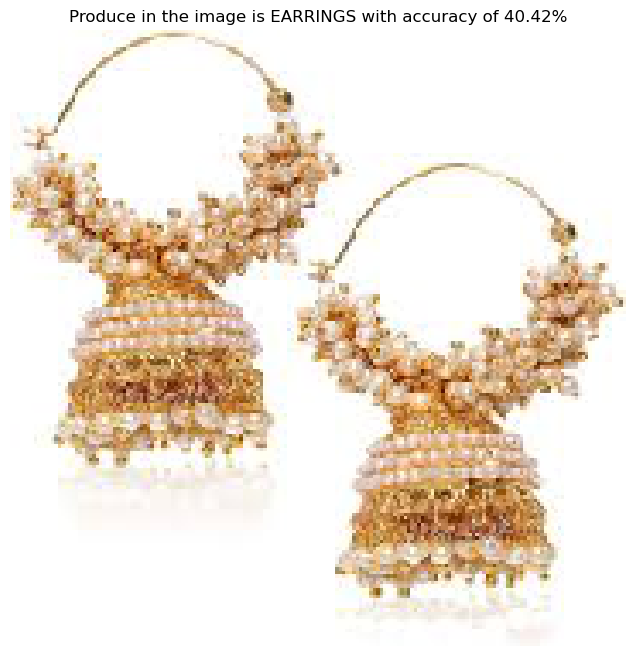

In [15]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_1)
plt.axis('off')  # Hide the axes
plt.title(f'Produce in the image is {data_cat[np.argmax(score)]} with accuracy of {np.max(score)*100:.2f}%')
plt.show()

In [16]:
# Predicting on a new image
image_2_path = r"C:\Users\Dell\Downloads\jewellery test2.jpeg"
image_2 = tf.keras.utils.load_img(image_2_path, target_size=(img_height, img_width))
img_arr_2 = tf.keras.utils.img_to_array(image_2)
img_bat_2 = tf.expand_dims(img_arr_2, 0)  # Expand dimensions to match the input shape

In [17]:
predict_2 = classifier.predict(img_bat_2)
score_2 = tf.nn.softmax(predict_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


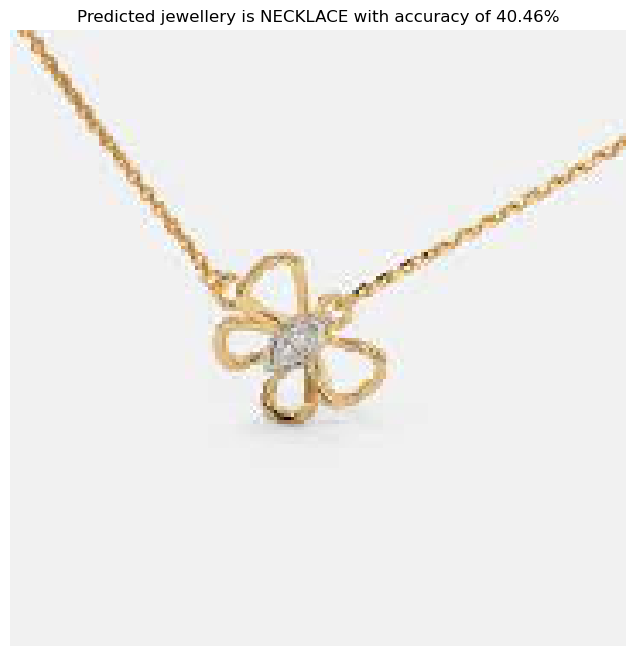

In [18]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_2)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_2)]} with accuracy of {np.max(score_2)*100:.2f}%')
plt.show()

In [19]:
# Predicting on a new image
image_3_path = r"C:\Users\Dell\Downloads\jewellery test 3.jpeg"
image_3 = tf.keras.utils.load_img(image_3_path, target_size=(img_height, img_width))
img_arr_3 = tf.keras.utils.img_to_array(image_3)
img_bat_3 = tf.expand_dims(img_arr_3, 0)  # Expand dimensions to match the input shape

In [20]:
predict_3 = classifier.predict(img_bat_3)
score_3 = tf.nn.softmax(predict_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


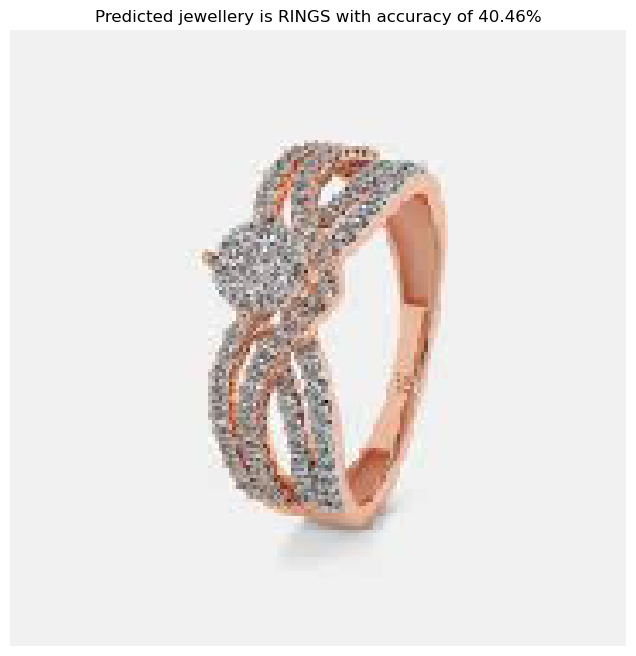

In [21]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_3)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_3)]} with accuracy of {np.max(score_3)*100:.2f}%')
plt.show()

In [22]:
# Predicting on a new image
image_4_path = r"C:\Users\Dell\Downloads\jewellery test 4.jpeg"
image_4 = tf.keras.utils.load_img(image_4_path, target_size=(img_height, img_width))
img_arr_4 = tf.keras.utils.img_to_array(image_4)
img_bat_4 = tf.expand_dims(img_arr_4, 0)  # Expand dimensions to match the input shape

In [23]:
predict_4 = classifier.predict(img_bat_4)
score_4 = tf.nn.softmax(predict_4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


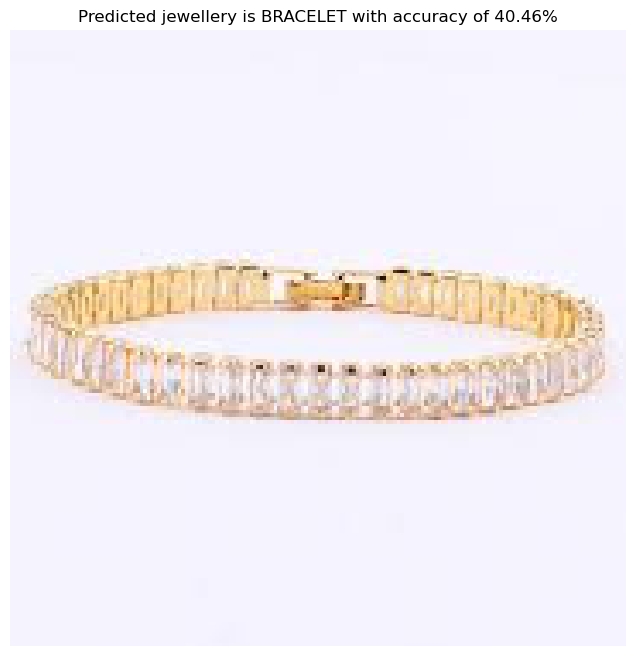

In [24]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_4)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_4)]} with accuracy of {np.max(score_4)*100:.2f}%')
plt.show()

In [25]:
# Predicting on a new image
image_5_path = r"C:\Users\Dell\Downloads\jewellery test 5.jpeg"
image_5 = tf.keras.utils.load_img(image_5_path, target_size=(img_height, img_width))
img_arr_5 = tf.keras.utils.img_to_array(image_5)
img_bat_5 = tf.expand_dims(img_arr_5, 0)  # Expand dimensions to match the input shape

In [26]:
predict_5 = classifier.predict(img_bat_5)
score_5 = tf.nn.softmax(predict_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


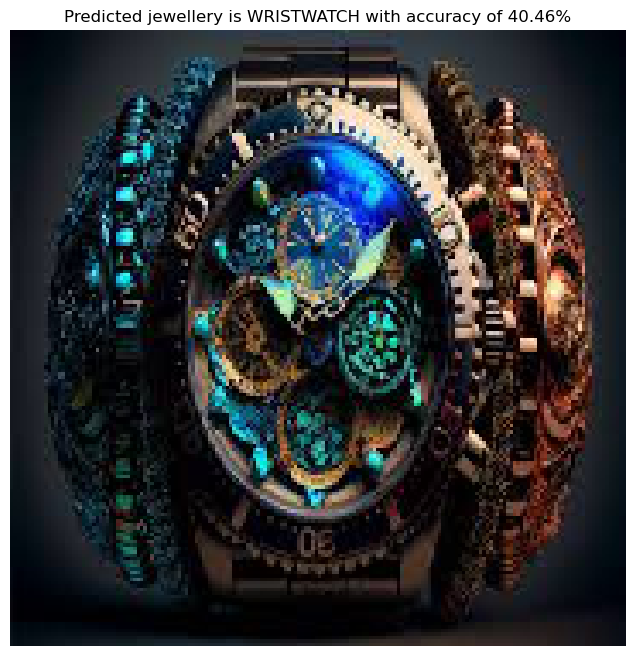

In [27]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_5)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_5)]} with accuracy of {np.max(score_5)*100:.2f}%')
plt.show()

In [28]:
# Predicting on a new image
image_6_path = r"C:\Users\Dell\Downloads\jewellery test 6.jpeg"
image_6 = tf.keras.utils.load_img(image_6_path, target_size=(img_height, img_width))
img_arr_6 = tf.keras.utils.img_to_array(image_6)
img_bat_6 = tf.expand_dims(img_arr_6, 0)  # Expand dimensions to match the input shape

In [29]:
predict_6 = classifier.predict(img_bat_6)
score_6 = tf.nn.softmax(predict_6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


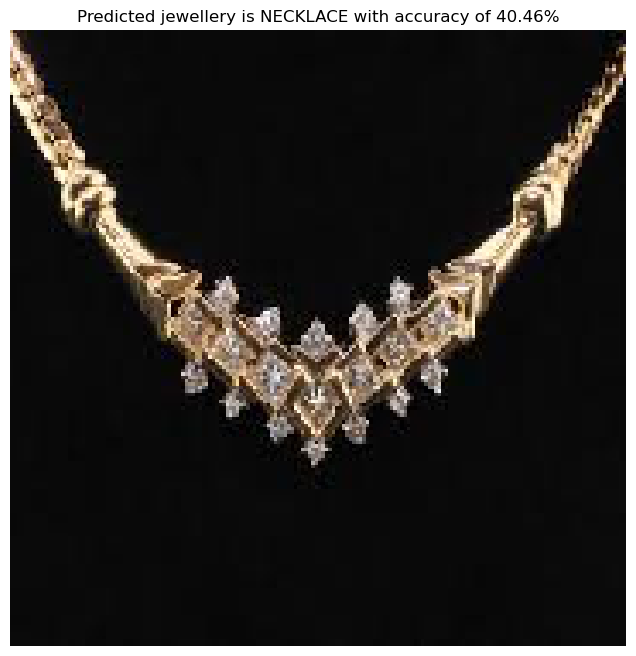

In [30]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_6)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_6)]} with accuracy of {np.max(score_6)*100:.2f}%')
plt.show()

In [31]:
# Predicting on a new image
image_7_path = r"C:\Users\Dell\Downloads\jewellery test 7.jpeg"
image_7 = tf.keras.utils.load_img(image_7_path, target_size=(img_height, img_width))
img_arr_7 = tf.keras.utils.img_to_array(image_7)
img_bat_7 = tf.expand_dims(img_arr_7, 0)  # Expand dimensions to match the input shape

In [32]:
predict_7 = classifier.predict(img_bat_7)
score_7 = tf.nn.softmax(predict_7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


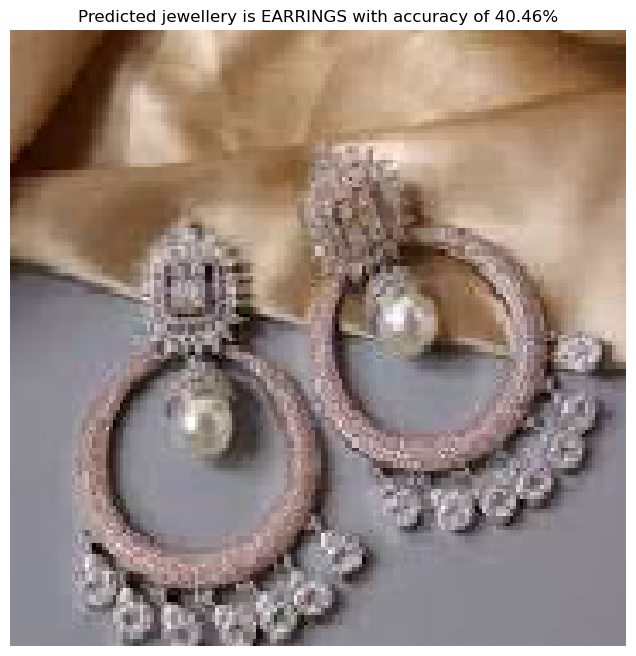

In [33]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_7)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_7)]} with accuracy of {np.max(score_7)*100:.2f}%')
plt.show()

In [42]:
# Predicting on a new image
image_8_path = r"C:\Users\Dell\Desktop\Visom6\Jewellery-Classification-master\dataset\training\NECKLACE\necklace_93.jpg"
image_8 = tf.keras.utils.load_img(image_8_path, target_size=(img_height, img_width))
img_arr_8 = tf.keras.utils.img_to_array(image_8)
img_bat_8 = tf.expand_dims(img_arr_8, 0)  # Expand dimensions to match the input shape

predict_8 = classifier.predict(img_bat_8)
score_8 = tf.nn.softmax(predict_8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


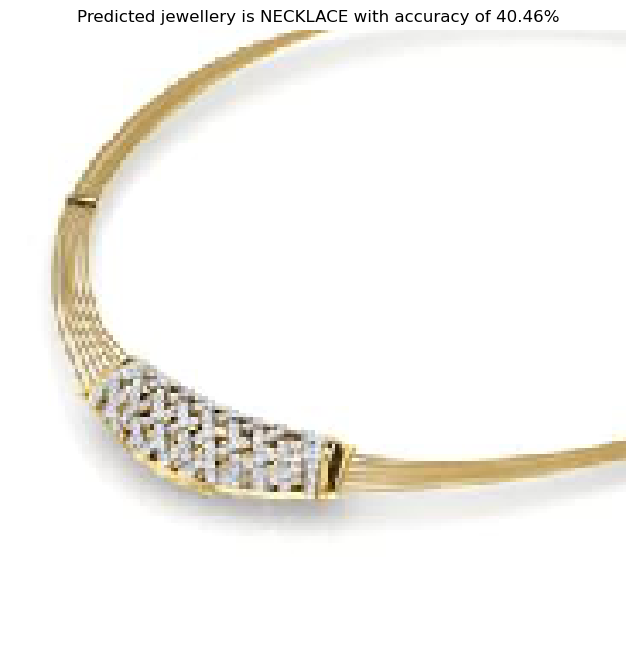

In [43]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_8)
plt.axis('off')  # Hide the axes
plt.title(f'Predicted jewellery is {data_cat[np.argmax(score_8)]} with accuracy of {np.max(score_8)*100:.2f}%')
plt.show()